In [70]:
#https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/problem12.html

import keras as k
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [71]:
data_frame = pd.read_csv("titanic.csv")
print(data_frame)

     Survived  Pclass                                               Name  \
0           0       3                             Mr. Owen Harris Braund   
1           1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2           1       3                              Miss. Laina Heikkinen   
3           1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
4           0       3                            Mr. William Henry Allen   
..        ...     ...                                                ...   
882         0       2                               Rev. Juozas Montvila   
883         1       1                        Miss. Margaret Edith Graham   
884         0       3                     Miss. Catherine Helen Johnston   
885         1       1                               Mr. Karl Howell Behr   
886         0       3                                 Mr. Patrick Dooley   

        Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
0      m

In [72]:
print(data_frame.head(n=5))

   Survived  Pclass                                               Name  \
0         0       3                             Mr. Owen Harris Braund   
1         1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2         1       3                              Miss. Laina Heikkinen   
3         1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
4         0       3                            Mr. William Henry Allen   

      Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
0    male  22.0                        1                        0   7.2500  
1  female  38.0                        1                        0  71.2833  
2  female  26.0                        0                        0   7.9250  
3  female  35.0                        1                        0  53.1000  
4    male  35.0                        0                        0   8.0500  


In [73]:
print(data_frame['Age'])

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
882    27.0
883    19.0
884     7.0
885    26.0
886    32.0
Name: Age, Length: 887, dtype: float64


In [74]:
input_names = ["Age", "Sex"]
print(data_frame[input_names])

      Age     Sex
0    22.0    male
1    38.0  female
2    26.0  female
3    35.0  female
4    35.0    male
..    ...     ...
882  27.0    male
883  19.0  female
884   7.0  female
885  26.0    male
886  32.0    male

[887 rows x 2 columns]


In [75]:
input_names = ["Age", "Sex", "Pclass"]
print(data_frame[input_names])
output_names = ["Survived"]
print(data_frame[output_names])

      Age     Sex  Pclass
0    22.0    male       3
1    38.0  female       1
2    26.0  female       3
3    35.0  female       1
4    35.0    male       3
..    ...     ...     ...
882  27.0    male       2
883  19.0  female       1
884   7.0  female       3
885  26.0    male       1
886  32.0    male       3

[887 rows x 3 columns]
     Survived
0           0
1           1
2           1
3           1
4           0
..        ...
882         0
883         1
884         0
885         1
886         0

[887 rows x 1 columns]


In [76]:
raw_input_date = data_frame[input_names]
raw_output_data = data_frame[output_names]

In [77]:
print(data_frame["Age"].max())

80.0


In [78]:
print(data_frame["Sex"].unique())

['male' 'female']


In [79]:
max_age = 100

In [80]:
encoders = {"Age": lambda age: age/max_age, 
            "Sex": lambda gen: {"male": 0, "female": 1}.get(gen),
            "Pclass": lambda pclass: {1: [1, 0, 0], 2: [0, 1, 0], 3: [0, 0, 1]}.get(pclass),
            "Survived": lambda s_value: s_value}


In [81]:
def dataframe_to_dict(df):
    result = dict()
    
    for column in df.columns:
        values = data_frame[column].values
        result[column] = values
    return result    

In [82]:
def make_supervised(df):
    raw_input_data = data_frame[input_names]
    raw_output_data = data_frame[output_names]
    return {"inputs": dataframe_to_dict(raw_input_data),
            "outputs": dataframe_to_dict(raw_output_data)}

In [83]:
supervised = make_supervised(data_frame)
print(supervised)

{'inputs': {'Age': array([22.  , 38.  , 26.  , 35.  , 35.  , 27.  , 54.  ,  2.  , 27.  ,
       14.  ,  4.  , 58.  , 20.  , 39.  , 14.  , 55.  ,  2.  , 23.  ,
       31.  , 22.  , 35.  , 34.  , 15.  , 28.  ,  8.  , 38.  , 26.  ,
       19.  , 24.  , 23.  , 40.  , 48.  , 18.  , 66.  , 28.  , 42.  ,
       18.  , 21.  , 18.  , 14.  , 40.  , 27.  ,  3.  , 19.  , 30.  ,
       20.  , 27.  , 16.  , 18.  ,  7.  , 21.  , 49.  , 29.  , 65.  ,
       46.  , 21.  , 28.5 ,  5.  , 11.  , 22.  , 38.  , 45.  ,  4.  ,
       64.  ,  7.  , 29.  , 19.  , 17.  , 26.  , 32.  , 16.  , 21.  ,
       26.  , 32.  , 25.  , 23.  , 28.  ,  0.83, 30.  , 22.  , 29.  ,
       31.  , 28.  , 17.  , 33.  , 16.  , 20.  , 23.  , 24.  , 29.  ,
       20.  , 46.  , 26.  , 59.  , 22.  , 71.  , 23.  , 34.  , 34.  ,
       28.  , 29.  , 21.  , 33.  , 37.  , 28.  , 21.  , 29.  , 38.  ,
       28.  , 47.  , 14.5 , 22.  , 20.  , 17.  , 21.  , 70.5 , 29.  ,
       24.  ,  2.  , 21.  , 19.  , 32.5 , 32.5 , 54.  , 12.  , 19.  ,
 

In [84]:
encoders = {"Age": lambda age: [age/max_age], 
            "Sex": lambda gen: {"male": [0], "female": [1]}.get(gen),
           "Pclass": lambda pclass: {1: [1, 0, 0], 2: [0, 1, 0], 3: [0, 0, 1]}.get(pclass),
           "Survived": lambda s_value: [s_value]}

def encode(data):
    vectors = []
    for data_name, data_values in data.items():
        encoded = list(map(encoders[data_name], data_values))
        vectors.append(encoded)    
    #print(vectors)    
    formatted = []
    for vector_raw in list(zip(*vectors)):
        vector = []
        for element in vector_raw:
            for e in element:
                vector.append(e)
        formatted.append(vector)
    return formatted    

In [85]:
supervised = make_supervised(data_frame)
#print(supervised)

In [91]:
encoded_inputs = np.array(encode(supervised["inputs"]))
encoded_outputs = np.array(encode(supervised["outputs"]))


In [92]:
print(encoded_inputs)
print(encoded_outputs)

[[0.22 0.   0.   0.   1.  ]
 [0.38 1.   1.   0.   0.  ]
 [0.26 1.   0.   0.   1.  ]
 ...
 [0.07 1.   0.   0.   1.  ]
 [0.26 0.   1.   0.   0.  ]
 [0.32 0.   0.   0.   1.  ]]
[[0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 

In [93]:
train_x = encoded_inputs[:600]
train_y = encoded_outputs[:600]

test_x = encoded_inputs[600:]
test_y = encoded_outputs[600:]

In [94]:
model = k.Sequential()
model.add(k.layers.Dense(units=5, activation="relu"))
model.add(k.layers.Dense(units=1, activation="sigmoid"))
model.compile(loss="mse", optimizer="sgd", metrics=["accuracy"])


In [95]:
fit_results = model.fit(x=train_x, y=train_y, epochs=100, validation_split=0.2, verbose=1) #verbose=0,1, 2


Train on 480 samples, validate on 120 samples
Epoch 1/100
480/480 [==============================] - 0s 265us/step - loss: 0.2561 - accuracy: 0.5375 - val_loss: 0.2483 - val_accuracy: 0.6500
Epoch 2/100
480/480 [==============================] - 0s 25us/step - loss: 0.2553 - accuracy: 0.5667 - val_loss: 0.2476 - val_accuracy: 0.6333
Epoch 3/100
480/480 [==============================] - 0s 25us/step - loss: 0.2546 - accuracy: 0.5646 - val_loss: 0.2470 - val_accuracy: 0.6250
Epoch 4/100
480/480 [==============================] - 0s 33us/step - loss: 0.2539 - accuracy: 0.5604 - val_loss: 0.2464 - val_accuracy: 0.6167
Epoch 5/100
480/480 [==============================] - 0s 25us/step - loss: 0.2532 - accuracy: 0.5542 - val_loss: 0.2458 - val_accuracy: 0.6167
Epoch 6/100
480/480 [==============================] - 0s 25us/step - loss: 0.2526 - accuracy: 0.5500 - val_loss: 0.2452 - val_accuracy: 0.6167
Epoch 7/100
480/480 [==============================] - 0s 25us/step - loss: 0.2519 - accu

480/480 [==============================] - 0s 27us/step - loss: 0.2363 - accuracy: 0.6000 - val_loss: 0.2313 - val_accuracy: 0.6083
Epoch 58/100
480/480 [==============================] - 0s 27us/step - loss: 0.2360 - accuracy: 0.6021 - val_loss: 0.2310 - val_accuracy: 0.6083
Epoch 59/100
480/480 [==============================] - 0s 25us/step - loss: 0.2357 - accuracy: 0.6021 - val_loss: 0.2307 - val_accuracy: 0.6083
Epoch 60/100
480/480 [==============================] - 0s 25us/step - loss: 0.2353 - accuracy: 0.6021 - val_loss: 0.2304 - val_accuracy: 0.6083
Epoch 61/100
480/480 [==============================] - 0s 27us/step - loss: 0.2350 - accuracy: 0.6062 - val_loss: 0.2301 - val_accuracy: 0.6167
Epoch 62/100
480/480 [==============================] - 0s 25us/step - loss: 0.2347 - accuracy: 0.6042 - val_loss: 0.2298 - val_accuracy: 0.6167
Epoch 63/100
480/480 [==============================] - 0s 27us/step - loss: 0.2344 - accuracy: 0.6042 - val_loss: 0.2295 - val_accuracy: 0.616

In [96]:
import matplotlib.pyplot as plt

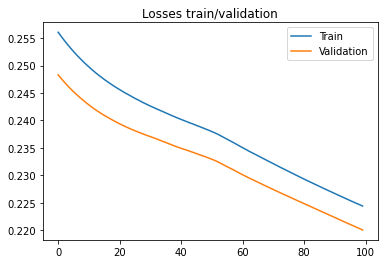

In [98]:
plt.title("Losses train/validation")
plt.plot(fit_results.history["loss"], label="Train")
plt.plot(fit_results.history["val_loss"], label="Validation")
plt.legend()
plt.show()

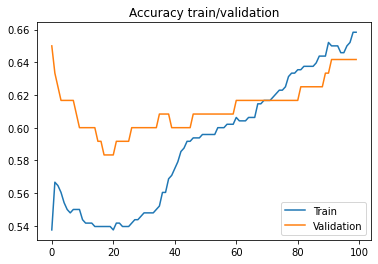

In [100]:
plt.title("Accuracy train/validation")
plt.plot(fit_results.history["accuracy"], label="Train")
plt.plot(fit_results.history["val_accuracy"], label="Validation")
plt.legend()
plt.show()